In [ ]:
# Environment installation (e.g for colab usage)
#!pip install adversarial-robustness-toolbox
#!pip install tf-nightly==2.3.0-dev20200521

In [1]:
# Main imports
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

import activationsf

In [16]:
# Load CIFAR10
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/ 255.0, x_test/ 255.0

time: 1.4 s


In [17]:
# Load robust model trained as https://arxiv.org/abs/2001.03994 which you want to test robustness
rob_kaf_cnn = tf.keras.models.load_model('/light_custom_models/kaf_cnn_robust_fbf') 

time: 2.64 s


In [20]:
from art.classifiers import TensorFlowV2Classifier
from art.attacks.evasion import ProjectedGradientDescent

# Wrap the model in a TensorFlowV2Classifier object
rob_kaf_cnn_art = TensorFlowV2Classifier(model=rob_kaf_cnn, nb_classes=10, input_shape=(32, 32, 3), loss_object=tf.keras.losses.SparseCategoricalCrossentropy(), clip_values=(0, 1))

time: 3.88 ms


In [21]:
# Set up a PGD attack w/ parameters as described in FBF ref paper
pgd = ProjectedGradientDescent(estimator= rob_kaf_cnn_art, eps= 8/255, eps_step=2/255, max_iter=50, num_random_init=10, norm=np.inf)

time: 1.94 ms


In [22]:
# If loaded, every output of subsequent cell execution will include the time in min and sec it took to execute it.
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.86 s


In [23]:
# Create 200 adversarial PGD Examples
test_sample_ids = np.random.randint(10000, size=200)
x_test_sample = x_test[test_sample_ids, :, :, :]
rob_kaf_test_adv = pgd.generate(x_test_sample)

time: 4min 26s


In [24]:
# If needed store them
#np.save('/content/rob_kaf_test_pgd.npy', rob_kaf_test_adv)

time: 32.5 ms


In [25]:
def find_original_img(perturbed_img, set='test'):
    """Retrieve original image id given an adversarial example""" 
    min_diff = np.math.inf
    index = 0
    
    if set == 'test':
      for i in range(0, x_test.shape[0]):
          diff = np.sum(abs(perturbed_img - x_test[i]))
          if diff < min_diff:
              min_diff = diff
              index = i
    
    elif set =='train':
      for i in range(0, x_train.shape[0]):
        diff = np.sum(abs(perturbed_img - x_train[i]))
        if diff < min_diff:
            min_diff = diff
            index = i
    else:
      print('Arg set must be either train or test')

    return index

time: 9.32 ms


In [26]:
# CIFAR10 Classes
classes = ['airplane', 
           'automobile', 
            'bird', 
            'cat', 
            'deer', 
            'dog', 
            'frog', 
            'horse', 
            'ship', 
            'truck']

time: 1.65 ms


In [27]:
def attack_succeed(original_img, idx, perturbed_img, model, plot = False, set='test'):
    """
        Return 0 if the model has been fooled 1 otherwise. Plot True if you want more info on the error margin
    """

    if plot:
        # Plot original img alongside with the perturbed one
        fig, ax = plt.subplots(1,2)
        ax[0].imshow(original_img);
        ax[0].title.set_text('Original')
        ax[0].axis('off')
        ax[1].imshow(perturbed_img)
        ax[1].title.set_text('Perturbed')
        ax[1].axis('off')
        plt.show()
        plt.close()

    # Predict
    perturbed_img = tf.expand_dims(perturbed_img, 0)

    if set=='test':
      original = classes[y_test[idx][0]]
    elif set =='train':
      original = classes[y_train[idx][0]]
    else:
      print('Arg set must be either train or test')

    perturbed = classes[np.argmax(model.predict(perturbed_img))]

    if plot:
        print("Real class: {}".format(original))
        print("Predicted class: {} with {} confidence".format(perturbed , round(np.max(model.predict(perturbed_img)) * 100)) )

    return (original == perturbed)

time: 23.2 ms


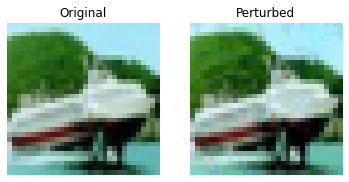

Real class: ship
Predicted class: automobile with 32.0 confidence


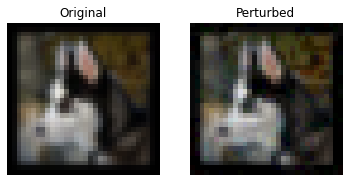

Real class: dog
Predicted class: cat with 24.0 confidence


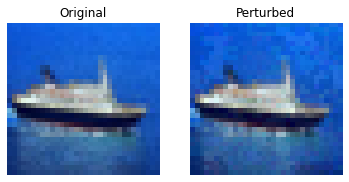

Real class: ship
Predicted class: ship with 50.0 confidence


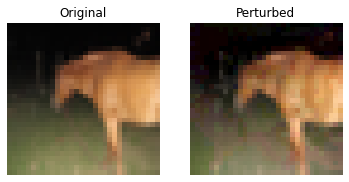

Real class: horse
Predicted class: frog with 36.0 confidence


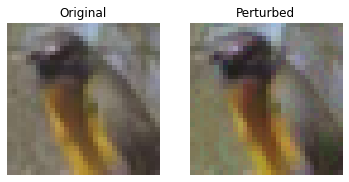

Real class: bird
Predicted class: horse with 27.0 confidence


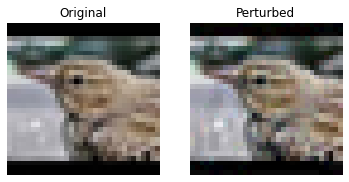

Real class: bird
Predicted class: frog with 25.0 confidence


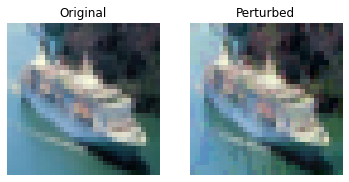

Real class: ship
Predicted class: frog with 20.0 confidence


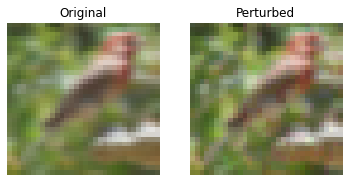

Real class: bird
Predicted class: frog with 51.0 confidence


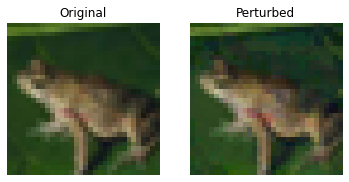

Real class: frog
Predicted class: frog with 49.0 confidence


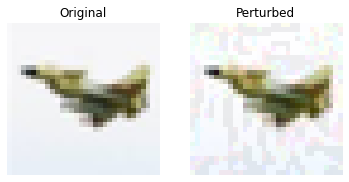

Real class: airplane
Predicted class: airplane with 90.0 confidence


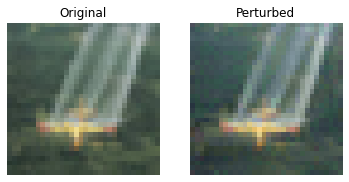

Real class: airplane
Predicted class: ship with 66.0 confidence


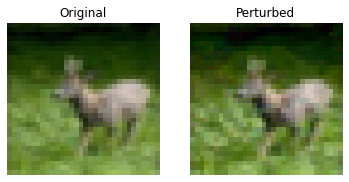

Real class: deer
Predicted class: deer with 48.0 confidence


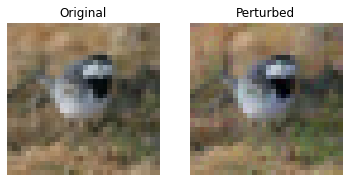

Real class: bird
Predicted class: bird with 39.0 confidence


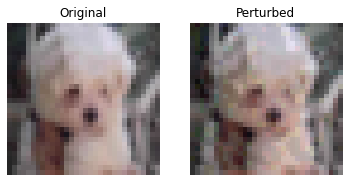

Real class: dog
Predicted class: dog with 35.0 confidence


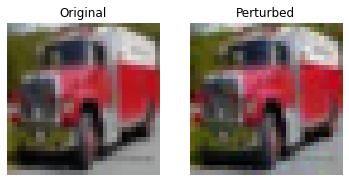

Real class: truck
Predicted class: automobile with 60.0 confidence


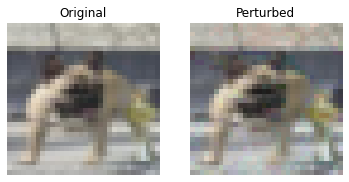

Real class: cat
Predicted class: bird with 25.0 confidence


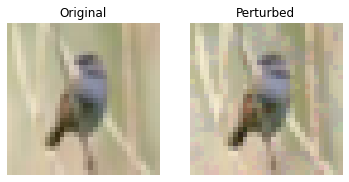

Real class: bird
Predicted class: bird with 34.0 confidence


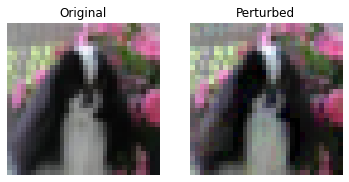

Real class: dog
Predicted class: horse with 47.0 confidence


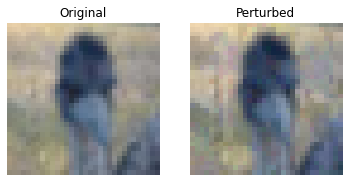

Real class: bird
Predicted class: bird with 30.0 confidence


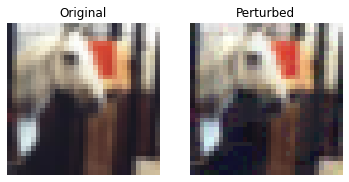

Real class: horse
Predicted class: truck with 26.0 confidence


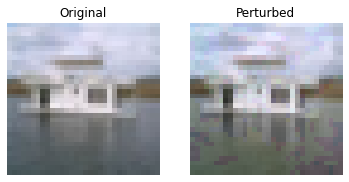

Real class: ship
Predicted class: airplane with 50.0 confidence


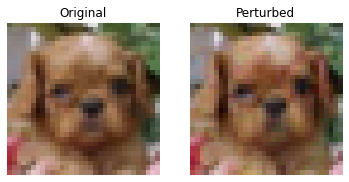

Real class: dog
Predicted class: horse with 47.0 confidence


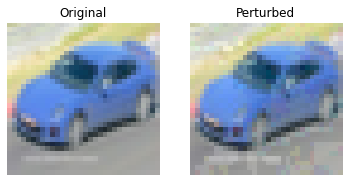

Real class: automobile
Predicted class: automobile with 49.0 confidence


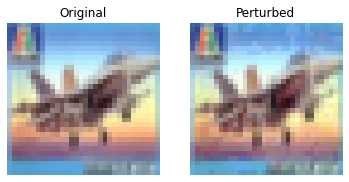

Real class: airplane
Predicted class: horse with 54.0 confidence


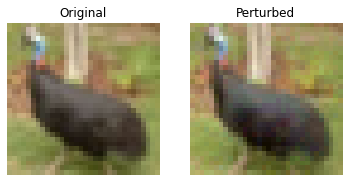

Real class: bird
Predicted class: deer with 38.0 confidence


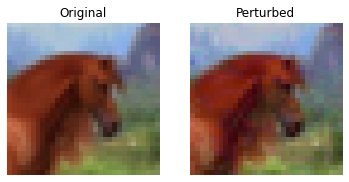

Real class: horse
Predicted class: horse with 23.0 confidence


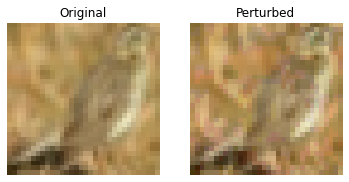

Real class: bird
Predicted class: frog with 39.0 confidence


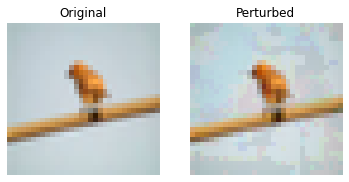

Real class: bird
Predicted class: bird with 43.0 confidence


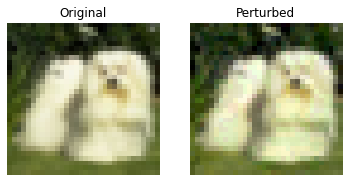

Real class: dog
Predicted class: dog with 40.0 confidence


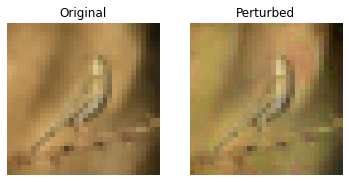

Real class: bird
Predicted class: deer with 34.0 confidence


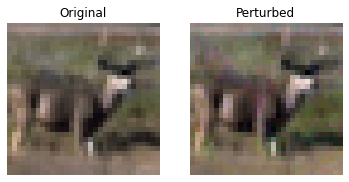

Real class: deer
Predicted class: horse with 52.0 confidence


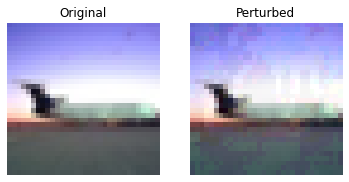

Real class: airplane
Predicted class: ship with 59.0 confidence


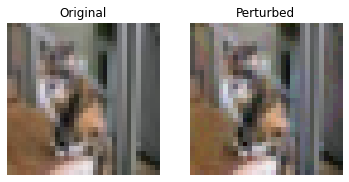

Real class: cat
Predicted class: bird with 35.0 confidence


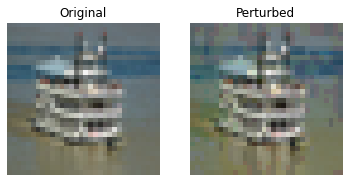

Real class: ship
Predicted class: frog with 29.0 confidence


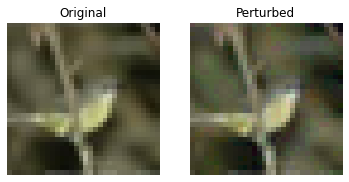

Real class: bird
Predicted class: deer with 38.0 confidence


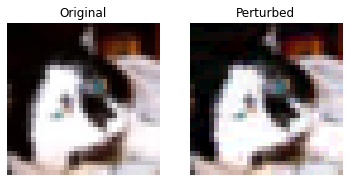

Real class: cat
Predicted class: dog with 41.0 confidence


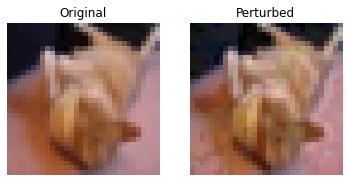

Real class: cat
Predicted class: frog with 37.0 confidence


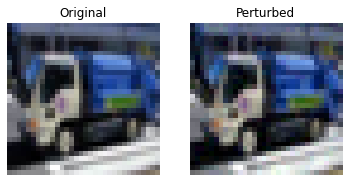

Real class: truck
Predicted class: automobile with 74.0 confidence


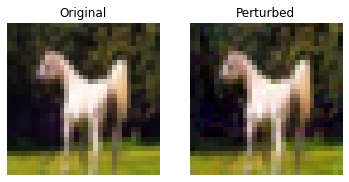

Real class: horse
Predicted class: horse with 49.0 confidence


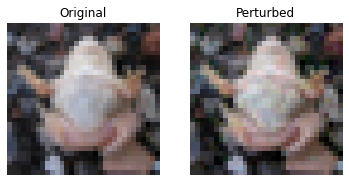

Real class: frog
Predicted class: frog with 62.0 confidence


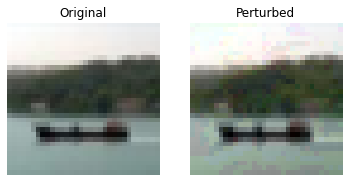

Real class: ship
Predicted class: ship with 33.0 confidence


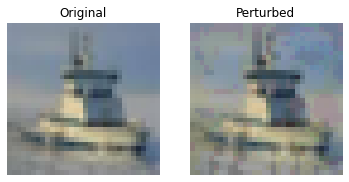

Real class: ship
Predicted class: bird with 47.0 confidence


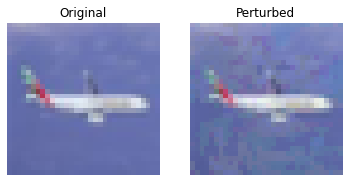

Real class: airplane
Predicted class: airplane with 58.0 confidence


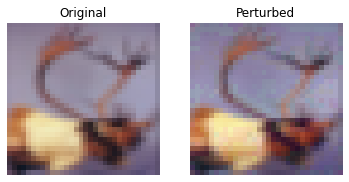

Real class: deer
Predicted class: ship with 52.0 confidence


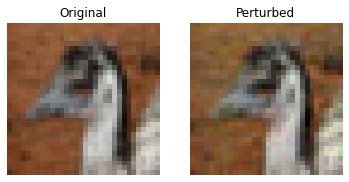

Real class: bird
Predicted class: bird with 31.0 confidence


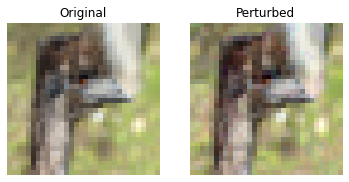

Real class: bird
Predicted class: horse with 30.0 confidence


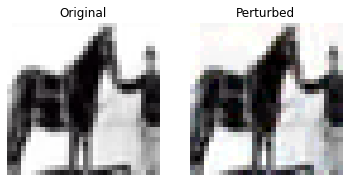

Real class: horse
Predicted class: horse with 41.0 confidence


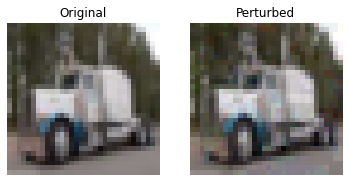

Real class: truck
Predicted class: automobile with 77.0 confidence


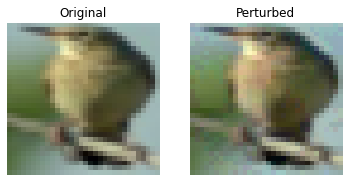

Real class: bird
Predicted class: bird with 25.0 confidence


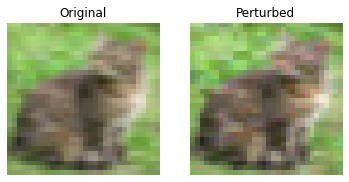

Real class: cat
Predicted class: frog with 43.0 confidence


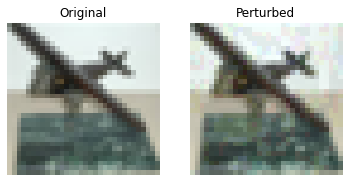

Real class: airplane
Predicted class: horse with 14.0 confidence


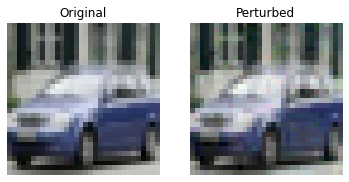

Real class: automobile
Predicted class: automobile with 69.0 confidence


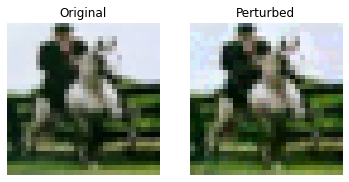

Real class: horse
Predicted class: horse with 68.0 confidence


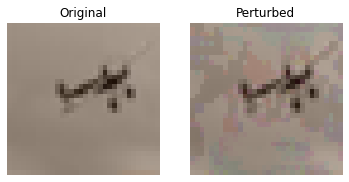

Real class: airplane
Predicted class: deer with 31.0 confidence


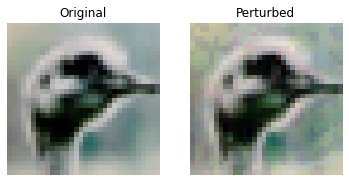

Real class: bird
Predicted class: bird with 33.0 confidence


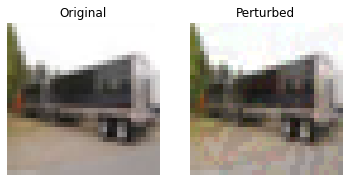

Real class: truck
Predicted class: truck with 34.0 confidence


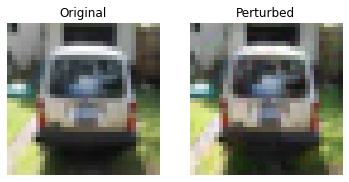

Real class: automobile
Predicted class: dog with 18.0 confidence


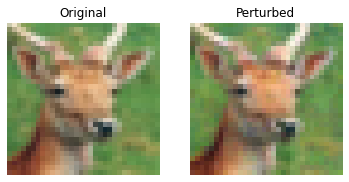

Real class: deer
Predicted class: deer with 28.0 confidence


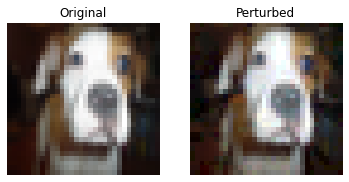

Real class: dog
Predicted class: dog with 56.0 confidence


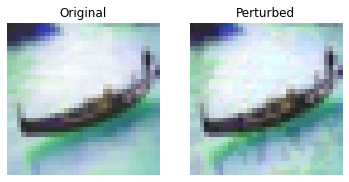

Real class: ship
Predicted class: airplane with 77.0 confidence


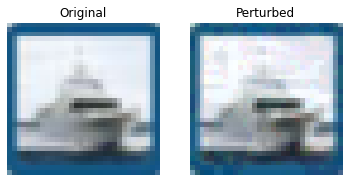

Real class: ship
Predicted class: ship with 38.0 confidence


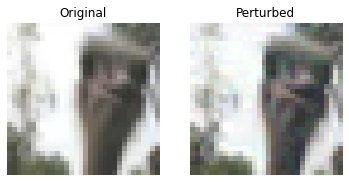

Real class: bird
Predicted class: cat with 25.0 confidence


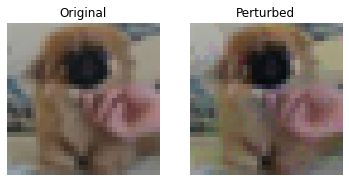

Real class: dog
Predicted class: bird with 31.0 confidence


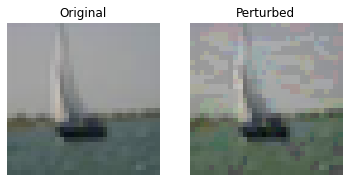

Real class: ship
Predicted class: airplane with 48.0 confidence


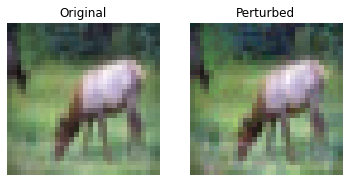

Real class: deer
Predicted class: deer with 44.0 confidence


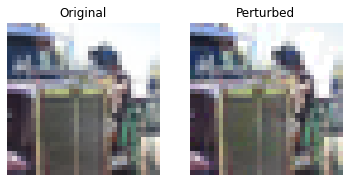

Real class: truck
Predicted class: horse with 36.0 confidence


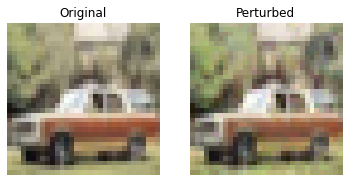

Real class: automobile
Predicted class: truck with 19.0 confidence


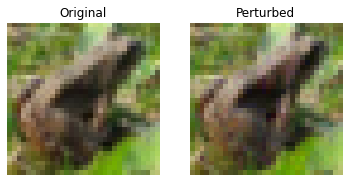

Real class: frog
Predicted class: bird with 28.0 confidence


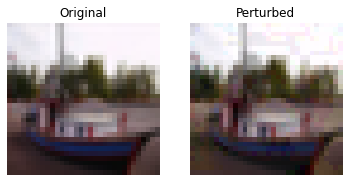

Real class: ship
Predicted class: truck with 29.0 confidence


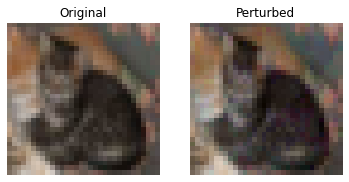

Real class: cat
Predicted class: cat with 26.0 confidence


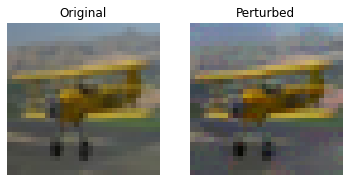

Real class: airplane
Predicted class: ship with 46.0 confidence


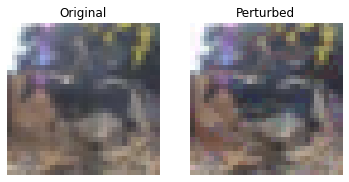

Real class: horse
Predicted class: frog with 28.0 confidence


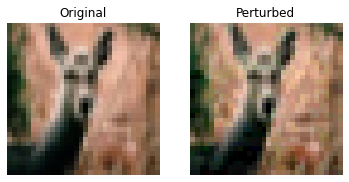

Real class: deer
Predicted class: bird with 27.0 confidence


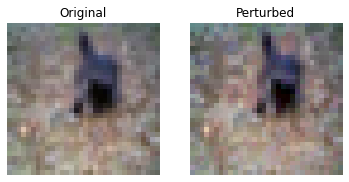

Real class: cat
Predicted class: deer with 29.0 confidence


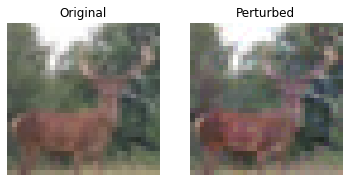

Real class: deer
Predicted class: truck with 21.0 confidence


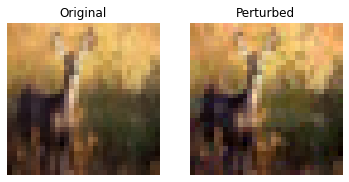

Real class: deer
Predicted class: frog with 46.0 confidence


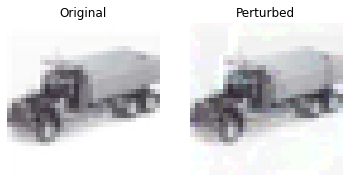

Real class: truck
Predicted class: airplane with 54.0 confidence


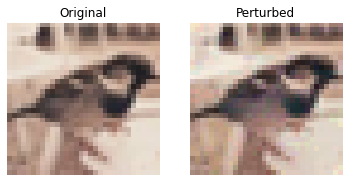

Real class: bird
Predicted class: bird with 40.0 confidence


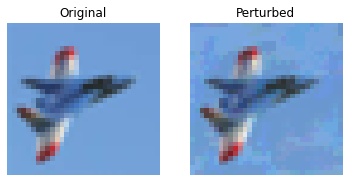

Real class: airplane
Predicted class: airplane with 65.0 confidence


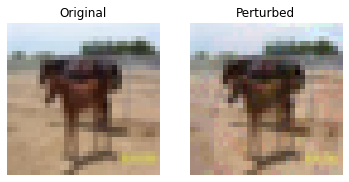

Real class: horse
Predicted class: bird with 33.0 confidence


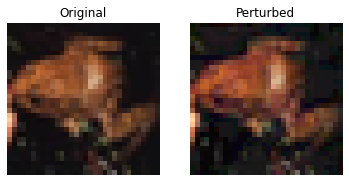

Real class: frog
Predicted class: frog with 35.0 confidence


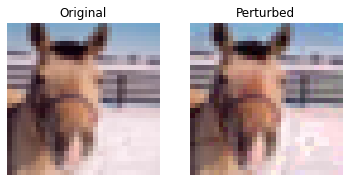

Real class: horse
Predicted class: horse with 32.0 confidence


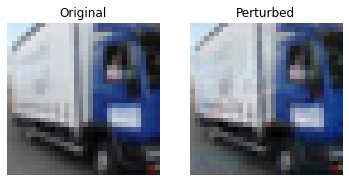

Real class: truck
Predicted class: truck with 63.0 confidence


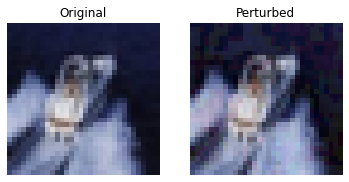

Real class: ship
Predicted class: cat with 30.0 confidence


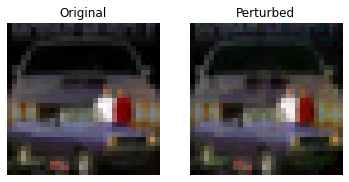

Real class: automobile
Predicted class: deer with 25.0 confidence


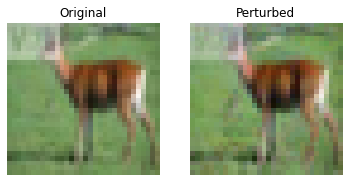

Real class: deer
Predicted class: bird with 55.0 confidence


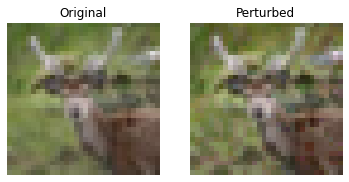

Real class: deer
Predicted class: frog with 56.0 confidence


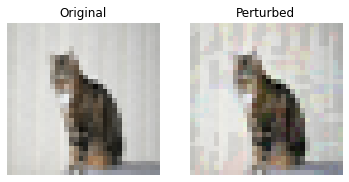

Real class: cat
Predicted class: bird with 36.0 confidence


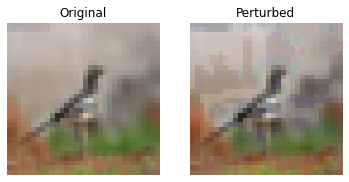

Real class: bird
Predicted class: deer with 27.0 confidence


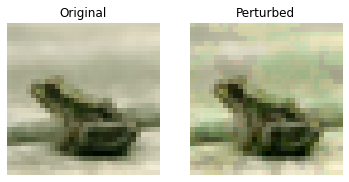

Real class: frog
Predicted class: frog with 34.0 confidence


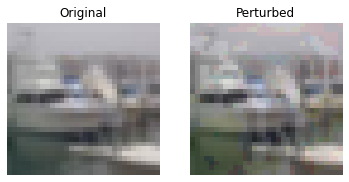

Real class: ship
Predicted class: airplane with 62.0 confidence


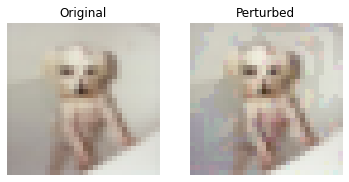

Real class: dog
Predicted class: dog with 26.0 confidence


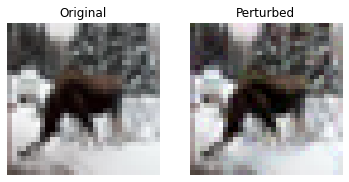

Real class: deer
Predicted class: cat with 23.0 confidence


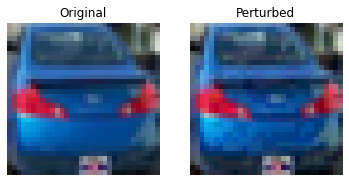

Real class: automobile
Predicted class: automobile with 69.0 confidence


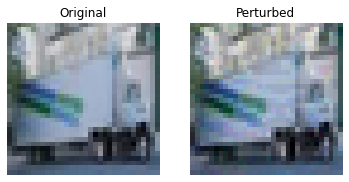

Real class: truck
Predicted class: automobile with 83.0 confidence


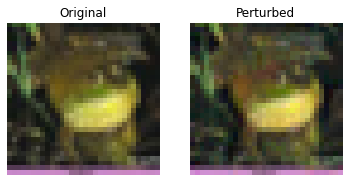

Real class: frog
Predicted class: deer with 56.0 confidence


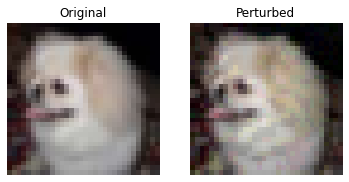

Real class: dog
Predicted class: dog with 39.0 confidence


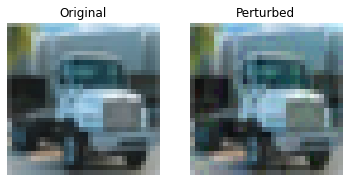

Real class: truck
Predicted class: truck with 63.0 confidence


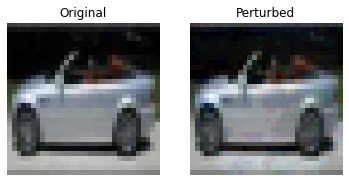

Real class: automobile
Predicted class: automobile with 70.0 confidence


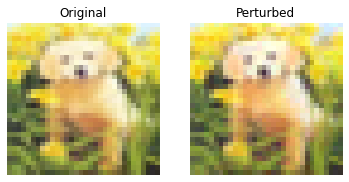

Real class: dog
Predicted class: dog with 51.0 confidence


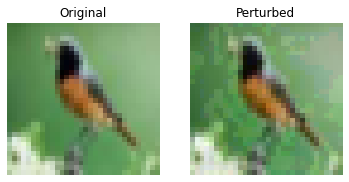

Real class: bird
Predicted class: frog with 33.0 confidence


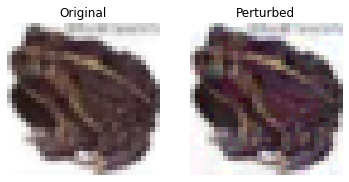

Real class: frog
Predicted class: frog with 51.0 confidence


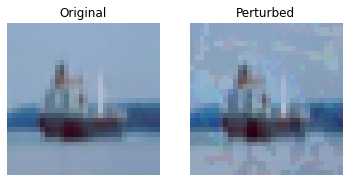

Real class: ship
Predicted class: airplane with 51.0 confidence


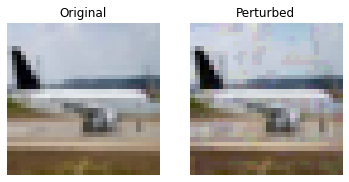

Real class: airplane
Predicted class: airplane with 71.0 confidence


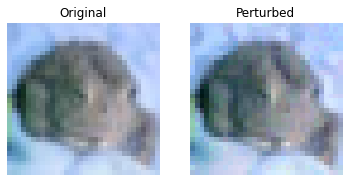

Real class: frog
Predicted class: truck with 49.0 confidence


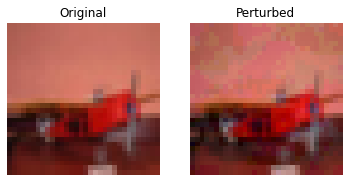

Real class: airplane
Predicted class: automobile with 60.0 confidence


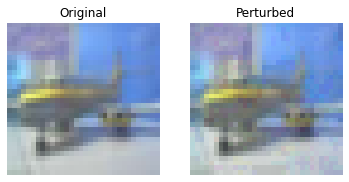

Real class: airplane
Predicted class: ship with 43.0 confidence


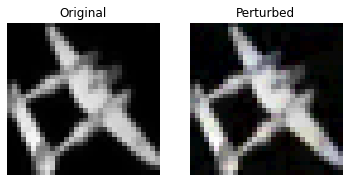

Real class: airplane
Predicted class: airplane with 21.0 confidence


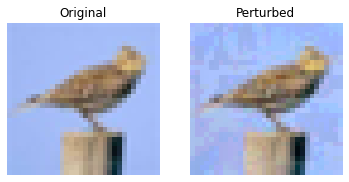

Real class: bird
Predicted class: airplane with 75.0 confidence


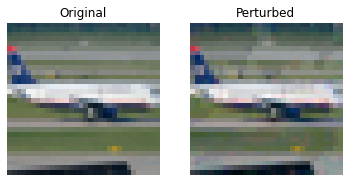

Real class: airplane
Predicted class: airplane with 56.0 confidence


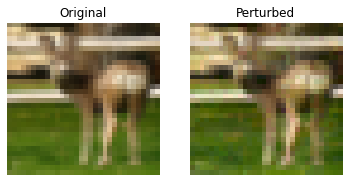

Real class: deer
Predicted class: bird with 33.0 confidence


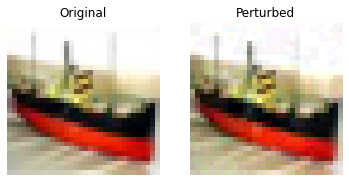

Real class: ship
Predicted class: ship with 68.0 confidence


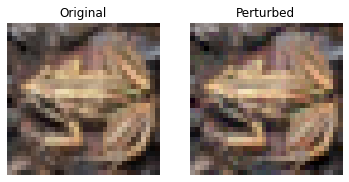

Real class: frog
Predicted class: frog with 52.0 confidence


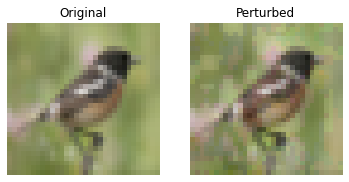

Real class: bird
Predicted class: deer with 31.0 confidence


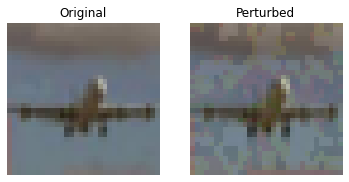

Real class: airplane
Predicted class: deer with 39.0 confidence


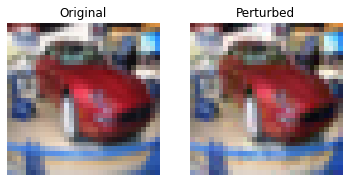

Real class: automobile
Predicted class: truck with 25.0 confidence


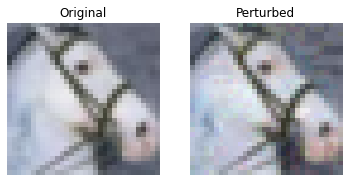

Real class: horse
Predicted class: bird with 23.0 confidence


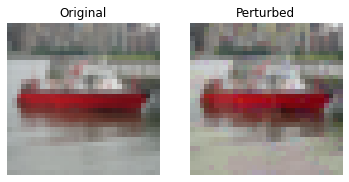

Real class: ship
Predicted class: automobile with 83.0 confidence


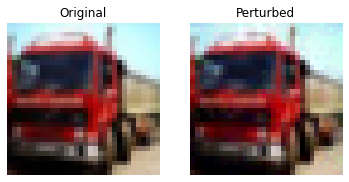

Real class: truck
Predicted class: truck with 63.0 confidence


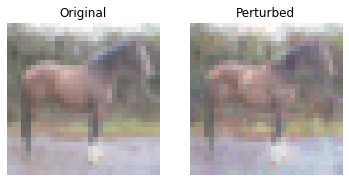

Real class: horse
Predicted class: cat with 23.0 confidence


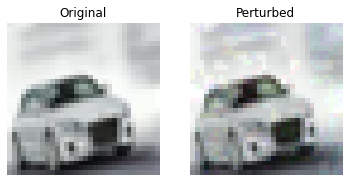

Real class: automobile
Predicted class: ship with 36.0 confidence


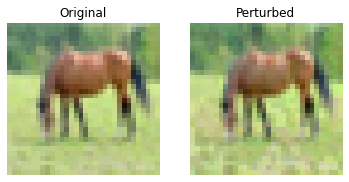

Real class: horse
Predicted class: horse with 53.0 confidence


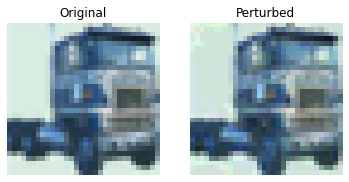

Real class: truck
Predicted class: truck with 30.0 confidence


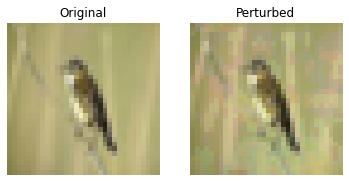

Real class: bird
Predicted class: deer with 44.0 confidence


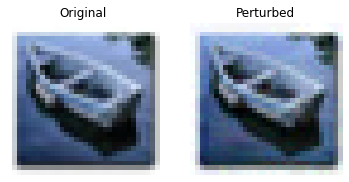

Real class: ship
Predicted class: ship with 68.0 confidence


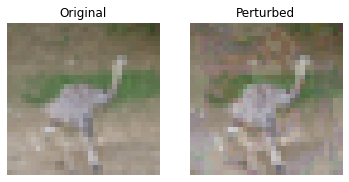

Real class: bird
Predicted class: frog with 40.0 confidence


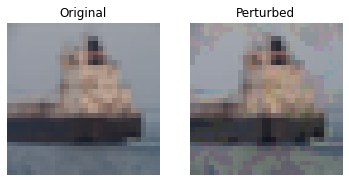

Real class: ship
Predicted class: ship with 41.0 confidence


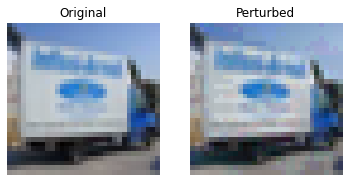

Real class: truck
Predicted class: ship with 78.0 confidence


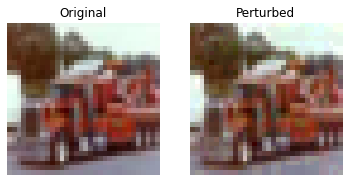

Real class: truck
Predicted class: truck with 53.0 confidence


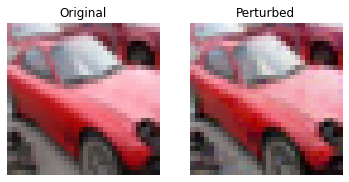

Real class: automobile
Predicted class: automobile with 59.0 confidence


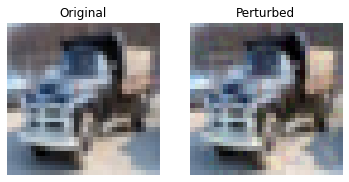

Real class: truck
Predicted class: horse with 34.0 confidence


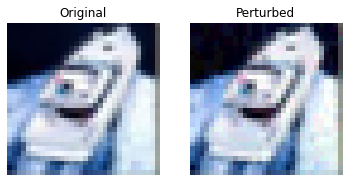

Real class: ship
Predicted class: dog with 43.0 confidence


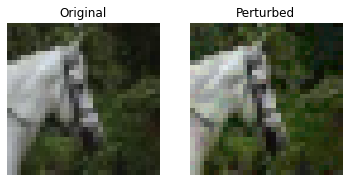

Real class: horse
Predicted class: frog with 24.0 confidence


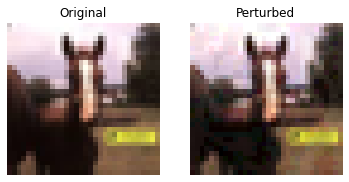

Real class: horse
Predicted class: truck with 43.0 confidence


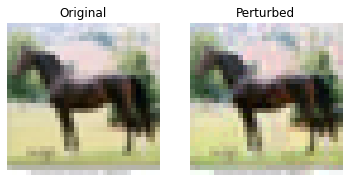

Real class: horse
Predicted class: horse with 89.0 confidence


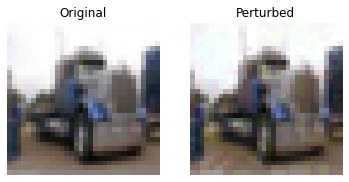

Real class: truck
Predicted class: truck with 56.0 confidence


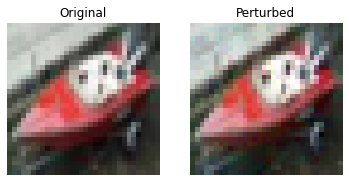

Real class: ship
Predicted class: ship with 43.0 confidence


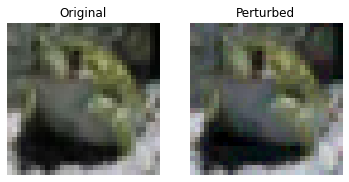

Real class: frog
Predicted class: cat with 22.0 confidence


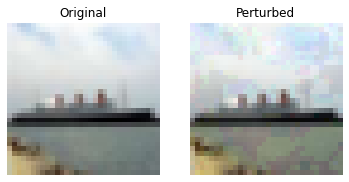

Real class: ship
Predicted class: airplane with 49.0 confidence


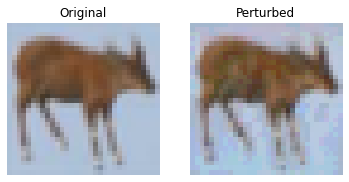

Real class: deer
Predicted class: horse with 23.0 confidence


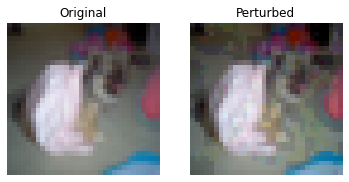

Real class: dog
Predicted class: cat with 38.0 confidence


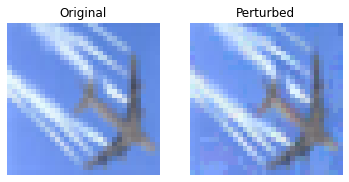

Real class: airplane
Predicted class: airplane with 51.0 confidence


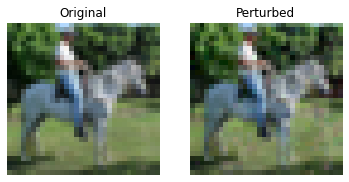

Real class: horse
Predicted class: bird with 26.0 confidence


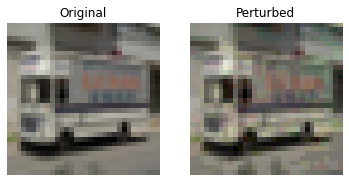

Real class: truck
Predicted class: automobile with 20.0 confidence


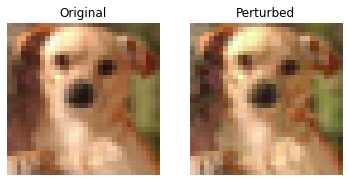

Real class: dog
Predicted class: dog with 40.0 confidence


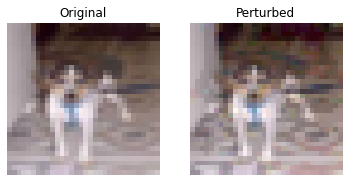

Real class: dog
Predicted class: frog with 30.0 confidence


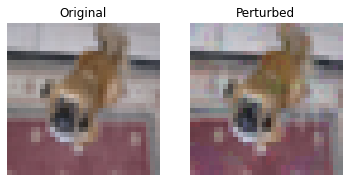

Real class: dog
Predicted class: frog with 19.0 confidence


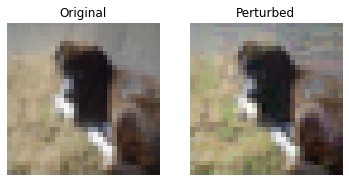

Real class: dog
Predicted class: bird with 48.0 confidence


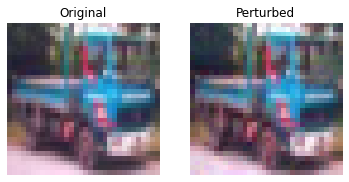

Real class: truck
Predicted class: truck with 74.0 confidence


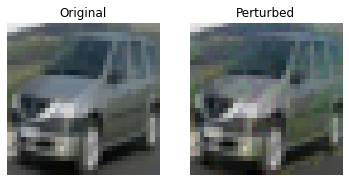

Real class: automobile
Predicted class: frog with 24.0 confidence


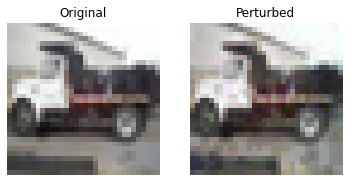

Real class: truck
Predicted class: truck with 31.0 confidence


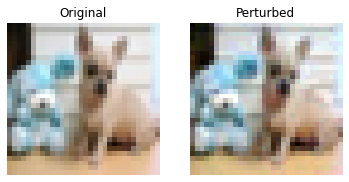

Real class: dog
Predicted class: truck with 35.0 confidence


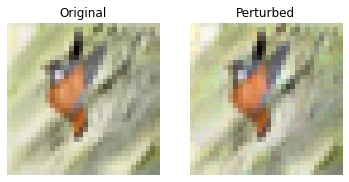

Real class: bird
Predicted class: bird with 32.0 confidence


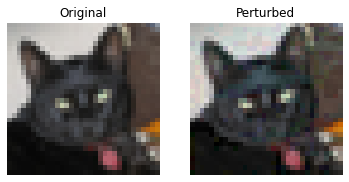

Real class: cat
Predicted class: truck with 37.0 confidence


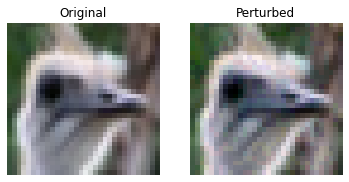

Real class: bird
Predicted class: bird with 36.0 confidence


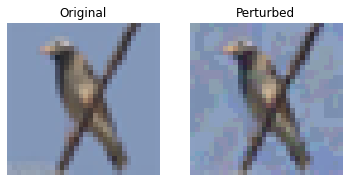

Real class: bird
Predicted class: bird with 33.0 confidence


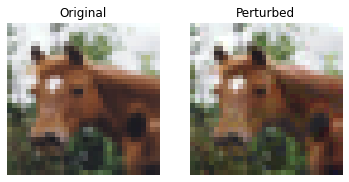

Real class: horse
Predicted class: horse with 57.0 confidence


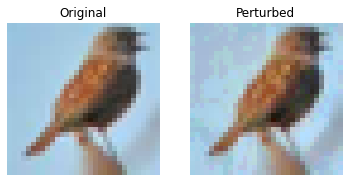

Real class: bird
Predicted class: bird with 60.0 confidence


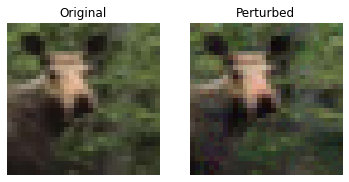

Real class: deer
Predicted class: bird with 27.0 confidence


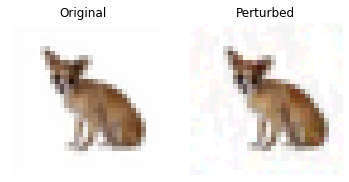

Real class: dog
Predicted class: bird with 22.0 confidence


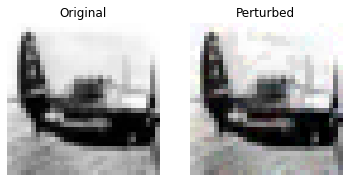

Real class: airplane
Predicted class: truck with 48.0 confidence


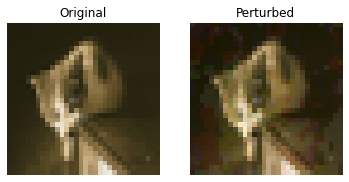

Real class: cat
Predicted class: frog with 46.0 confidence


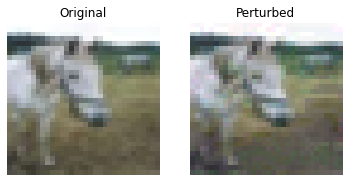

Real class: horse
Predicted class: airplane with 25.0 confidence


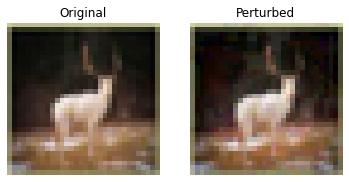

Real class: deer
Predicted class: cat with 21.0 confidence


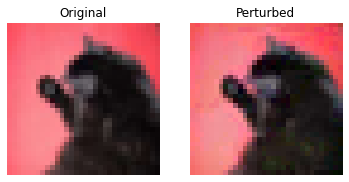

Real class: cat
Predicted class: bird with 28.0 confidence


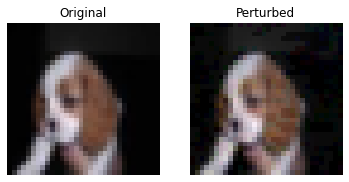

Real class: dog
Predicted class: cat with 33.0 confidence


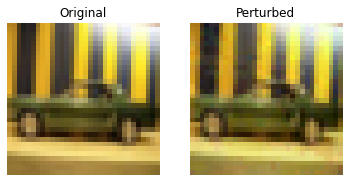

Real class: automobile
Predicted class: horse with 46.0 confidence


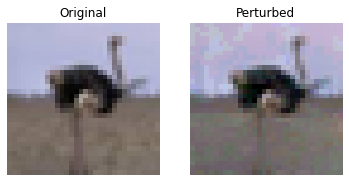

Real class: bird
Predicted class: airplane with 43.0 confidence


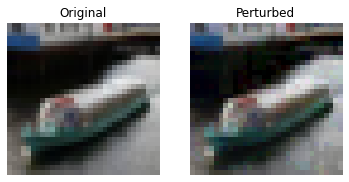

Real class: ship
Predicted class: ship with 46.0 confidence


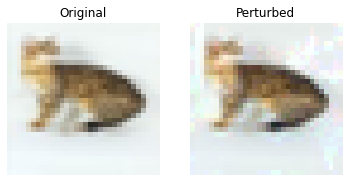

Real class: cat
Predicted class: frog with 44.0 confidence


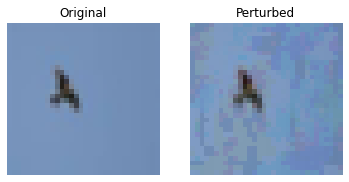

Real class: bird
Predicted class: airplane with 50.0 confidence


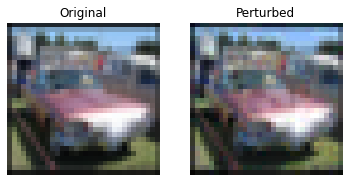

Real class: automobile
Predicted class: ship with 53.0 confidence


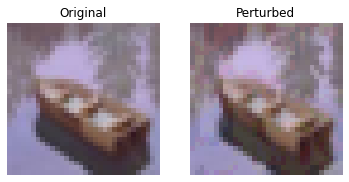

Real class: ship
Predicted class: frog with 37.0 confidence


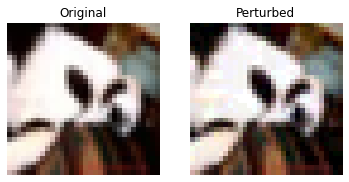

Real class: cat
Predicted class: horse with 43.0 confidence


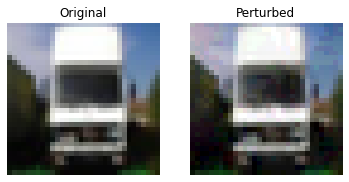

Real class: truck
Predicted class: truck with 35.0 confidence


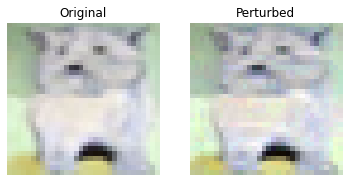

Real class: dog
Predicted class: airplane with 47.0 confidence


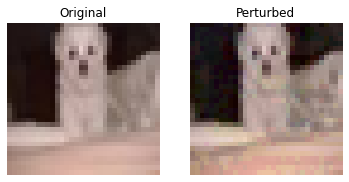

Real class: dog
Predicted class: cat with 34.0 confidence


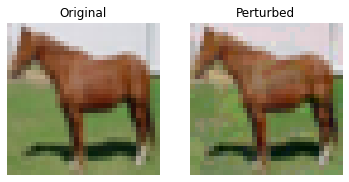

Real class: horse
Predicted class: horse with 87.0 confidence


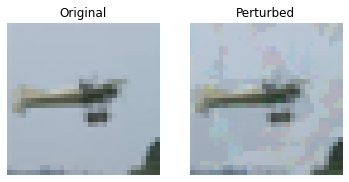

Real class: airplane
Predicted class: airplane with 68.0 confidence


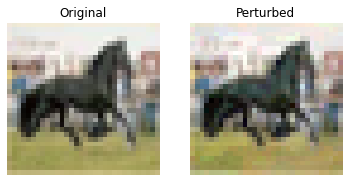

Real class: horse
Predicted class: horse with 52.0 confidence


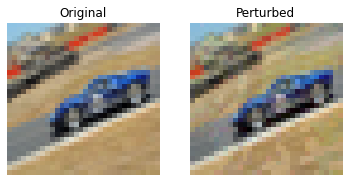

Real class: automobile
Predicted class: frog with 26.0 confidence


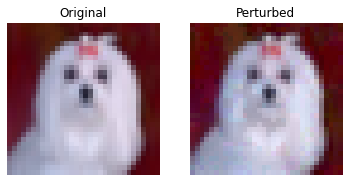

Real class: dog
Predicted class: dog with 71.0 confidence


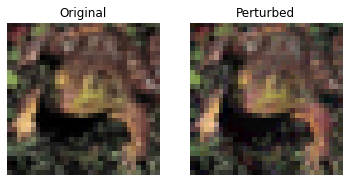

Real class: frog
Predicted class: frog with 45.0 confidence


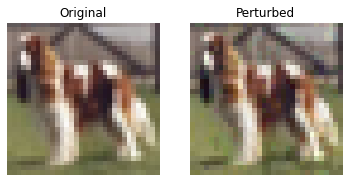

Real class: dog
Predicted class: deer with 25.0 confidence


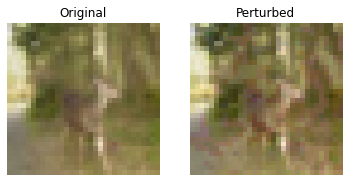

Real class: deer
Predicted class: frog with 44.0 confidence


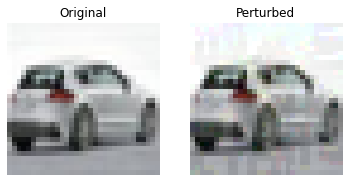

Real class: automobile
Predicted class: automobile with 66.0 confidence


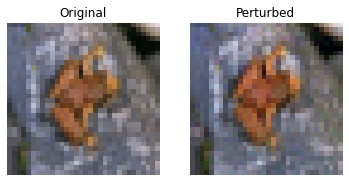

Real class: frog
Predicted class: deer with 24.0 confidence


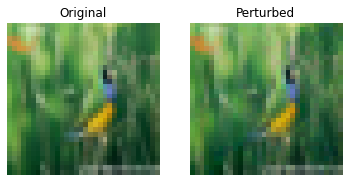

Real class: bird
Predicted class: deer with 47.0 confidence


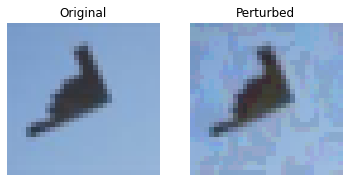

Real class: airplane
Predicted class: bird with 64.0 confidence


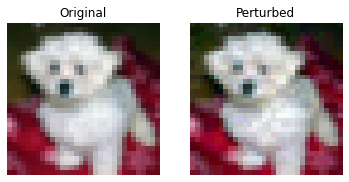

Real class: dog
Predicted class: dog with 74.0 confidence


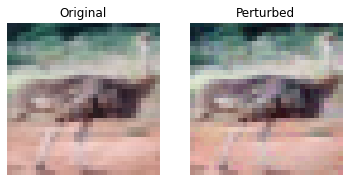

Real class: bird
Predicted class: automobile with 50.0 confidence


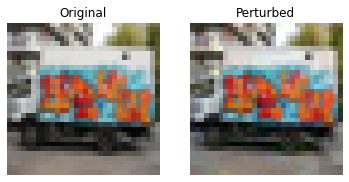

Real class: truck
Predicted class: automobile with 70.0 confidence


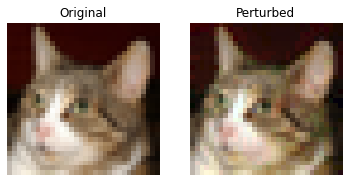

Real class: cat
Predicted class: cat with 38.0 confidence


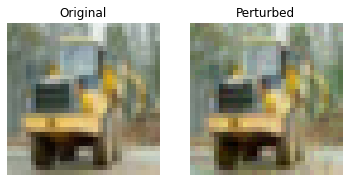

Real class: truck
Predicted class: frog with 32.0 confidence


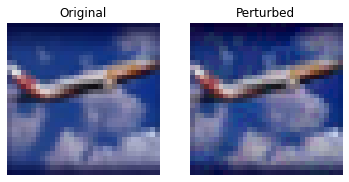

Real class: airplane
Predicted class: airplane with 56.0 confidence


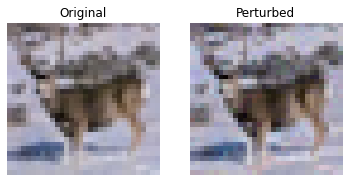

Real class: deer
Predicted class: deer with 26.0 confidence


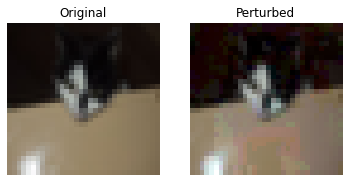

Real class: cat
Predicted class: deer with 45.0 confidence


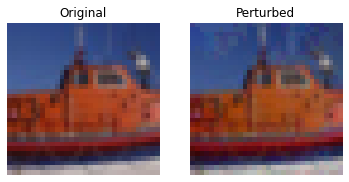

Real class: ship
Predicted class: ship with 50.0 confidence


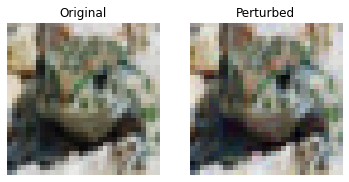

Real class: frog
Predicted class: cat with 35.0 confidence


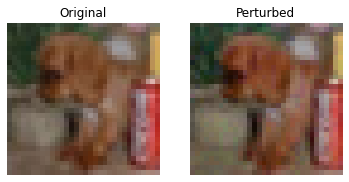

Real class: dog
Predicted class: horse with 37.0 confidence
Robust KAF CNN original Accuracy 0.635%
Robust KAF CNN Accuracy0.39%
time: 1min 31s


In [28]:
# Robustness Accuracy on test set for rob_kaf_cnn model, set plot=True if you want image-wise stats
nfool = 0
nacc = 0
for perturbed_img in rob_kaf_test_adv:
    
    original_idx = find_original_img(perturbed_img)
    nacc += attack_succeed(x_test[original_idx], original_idx, x_test[original_idx], rob_kaf_cnn, plot=False) 
    nfool += attack_succeed(x_test[original_idx], original_idx, perturbed_img, rob_kaf_cnn, plot=True) 

print("Robust KAF CNN original Accuracy {}%\nRobust KAF CNN Accuracy{}%".format(nacc/200, nfool/200))